# ライブラリのインポート

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import importlib

# 作業ディレクトリの設定

In [2]:
# 現在の作業ディレクトリを基にプロジェクトのルートディレクトリを設定
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', '..', '..'))
sys.path.append(project_root)

In [3]:
# 必要ライブラリのインポート
from src import plot
from src import data
import config

# ライブラリの再読み込み

In [4]:
# モジュールの再リロード
import src.plot
importlib.reload(src.plot)

<module 'src.plot' from 'c:\\Users\\keisu\\Desktop\\研究元ファイル\\abnormal\\research_abnormal\\src\\plot.py'>

# パラメータの設定

In [5]:
# 特徴平均誤差・特徴最大誤差で使用する期間
feature_error_period = 1

# 学習ログで使用するパラメータ
learning_seed = 50
learning_period = 1
learning_unit13 = 22
learning_unit2 = 10

# ファイルパスの設定

In [6]:
# 異常スコアデータ
anomaly_scores_path = "data/anomaly_score/combined_anomaly_scores.csv"

# 閾値データ
thresholds_path = "data/threshold/combined_threshold_scores.csv"

# 特徴平均誤差
errors_avg_path = f"data/errors/errors_average_per_features/errors_average_per_features_period{feature_error_period}.csv"

# 特徴最大誤差
errors_max_path = f"data/errors/errors_max_per_features/errors_max_per_features_period{feature_error_period}.csv"

# 学習データごとの誤差
errors_per_data_path = "data/errors/errors_per_data/errors_per_data.csv"

# 学習ログ
learning_scores_path = f"data/learning_scores/learning_scores_seed{learning_seed}/learning_scores_seed{learning_seed}_period{learning_period}/learning_scores_seed{learning_seed}_period{learning_period}_unit13_{learning_unit13}_unit2_{learning_unit2}.csv"

# モデル重み保存パス
weight_path = "data/weight/weight_seed{learning_seed}_period{learning_period}_unit13_{learning_unit13}_unit2_{learning_unit2}.csv"

# データの読み込み

In [7]:
# 異常スコア
abnormal_scores = pd.read_csv(anomaly_scores_path)
abnormal_scores["measurement_date"] = pd.to_datetime(abnormal_scores["measurement_date"])

# 閾値
thresholds = pd.read_csv(thresholds_path)
thresholds["test_start"] = pd.to_datetime(thresholds["test_start"])
thresholds["test_end"] = pd.to_datetime(thresholds["test_end"])

# 特徴平均誤差
errors_avg = pd.read_csv(errors_avg_path)

# 特徴最大誤差
errors_max = pd.read_csv(errors_max_path)

# 学習データごとの誤差
errors_per_data = pd.read_csv(errors_per_data_path)

# 学習ログ
learning_scores = pd.read_csv(learning_scores_path)

# 学習データ（正規化前）- 基準値計算用
data_ex, data_original = data.data_complete()

キャッシュファイルからデータを読み込みます


# 基準値の計算

In [8]:
def calculate_digit_count(value):
    """数値の整数部分の桁数を計算"""
    if value == 0:
        return 1
    abs_value = abs(value)
    int_part = int(abs_value)
    if int_part == 0:
        return 1
    return len(str(int_part))

def calculate_feature_thresholds(data_original, columns_list):
    """各特徴量の基準値を計算"""
    feature_thresholds = {}
    for col_name in columns_list:
        max_value = np.max(np.abs(data_original[col_name].values))
        digit_count = calculate_digit_count(max_value)
        threshold = 10 ** (-digit_count)
        feature_thresholds[col_name] = threshold
    return feature_thresholds

# 基準値の計算
feature_thresholds = calculate_feature_thresholds(data_original, config.columns_list)

# 異常データの可視化

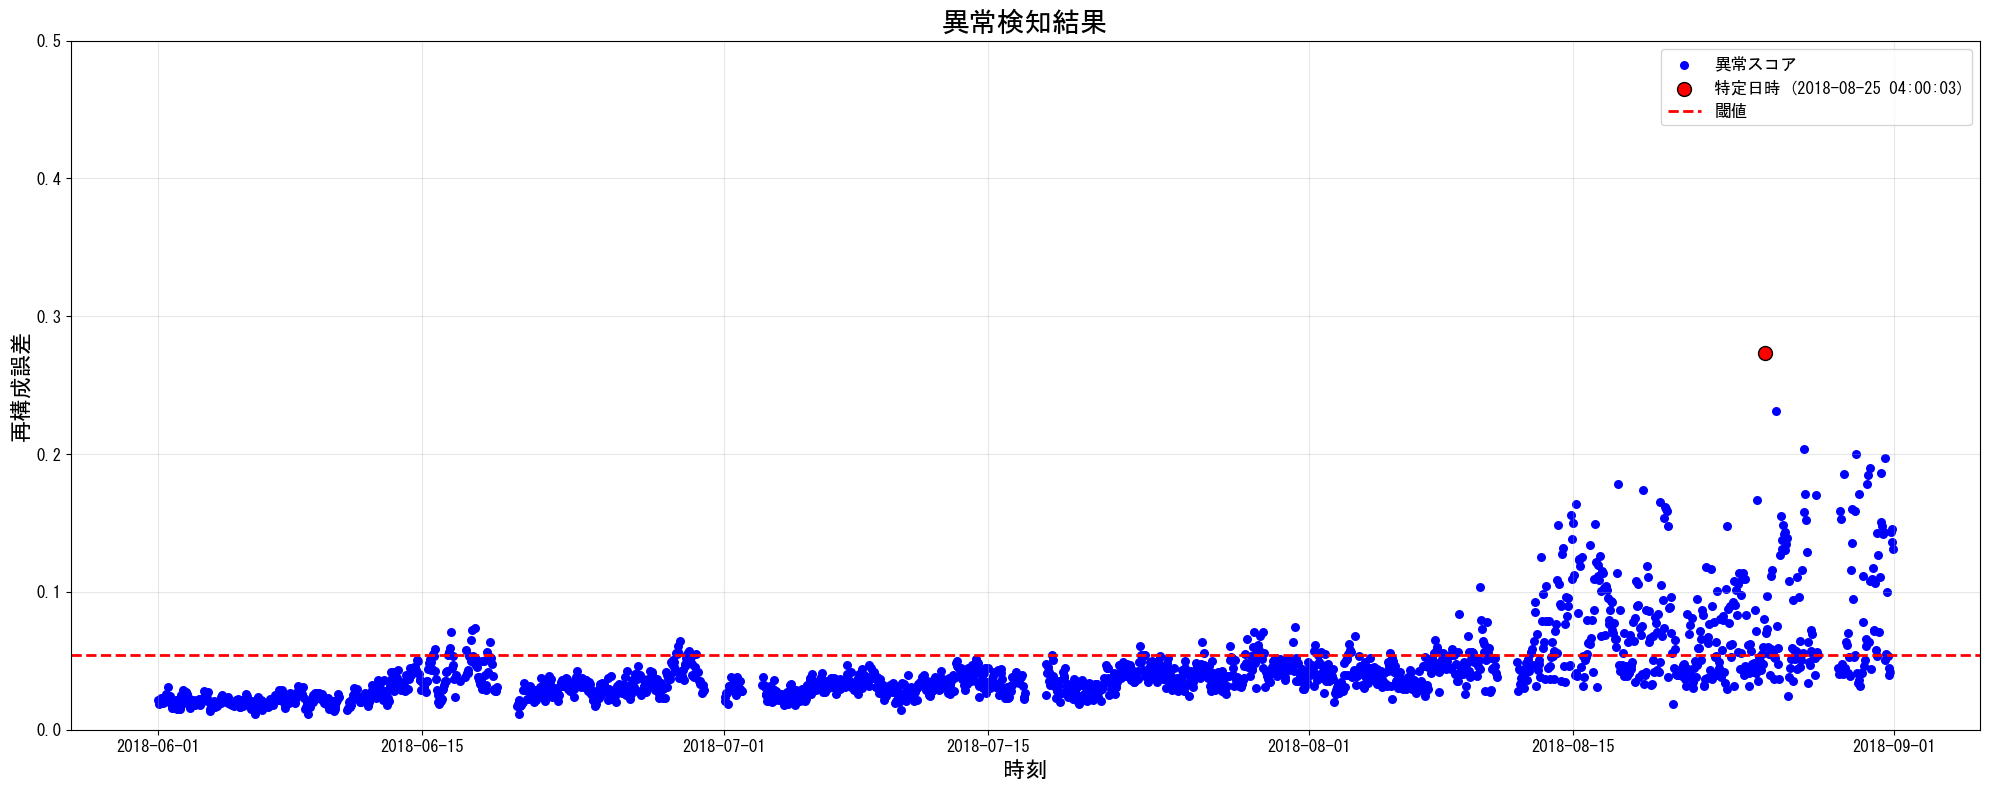

In [10]:
# 異常検知結果の可視化
# y_max: 縦軸の最大値
plot.plot_anomaly_scores(abnormal_scores, thresholds, y_max=0.5)

# 特徴平均誤差の可視化

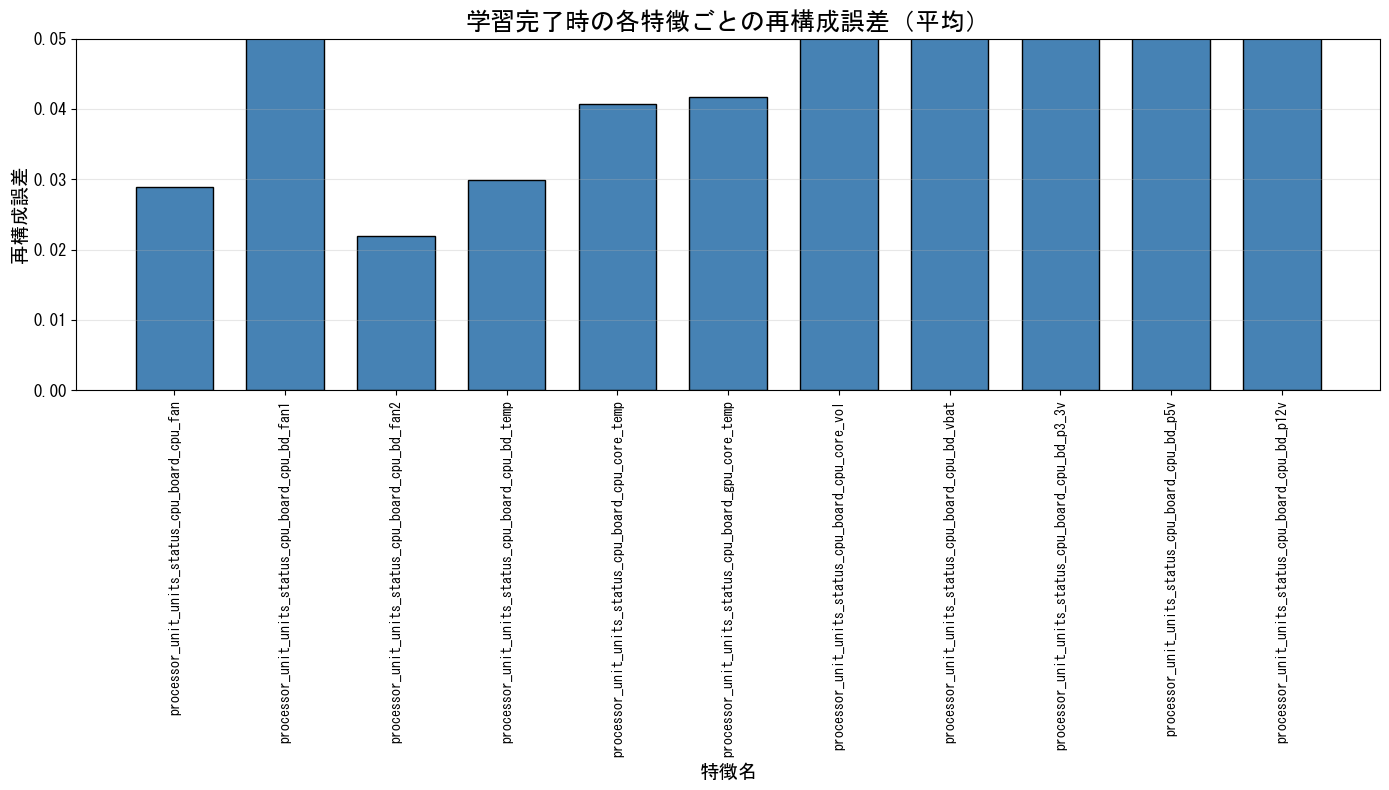

In [11]:
# 学習完了時の各特徴ごとの再構成誤差の平均
# y_max: 縦軸の最大値
plot.plot_feature_avg_errors(errors_avg, y_max=0.05)

# 特徴最大誤差の可視化

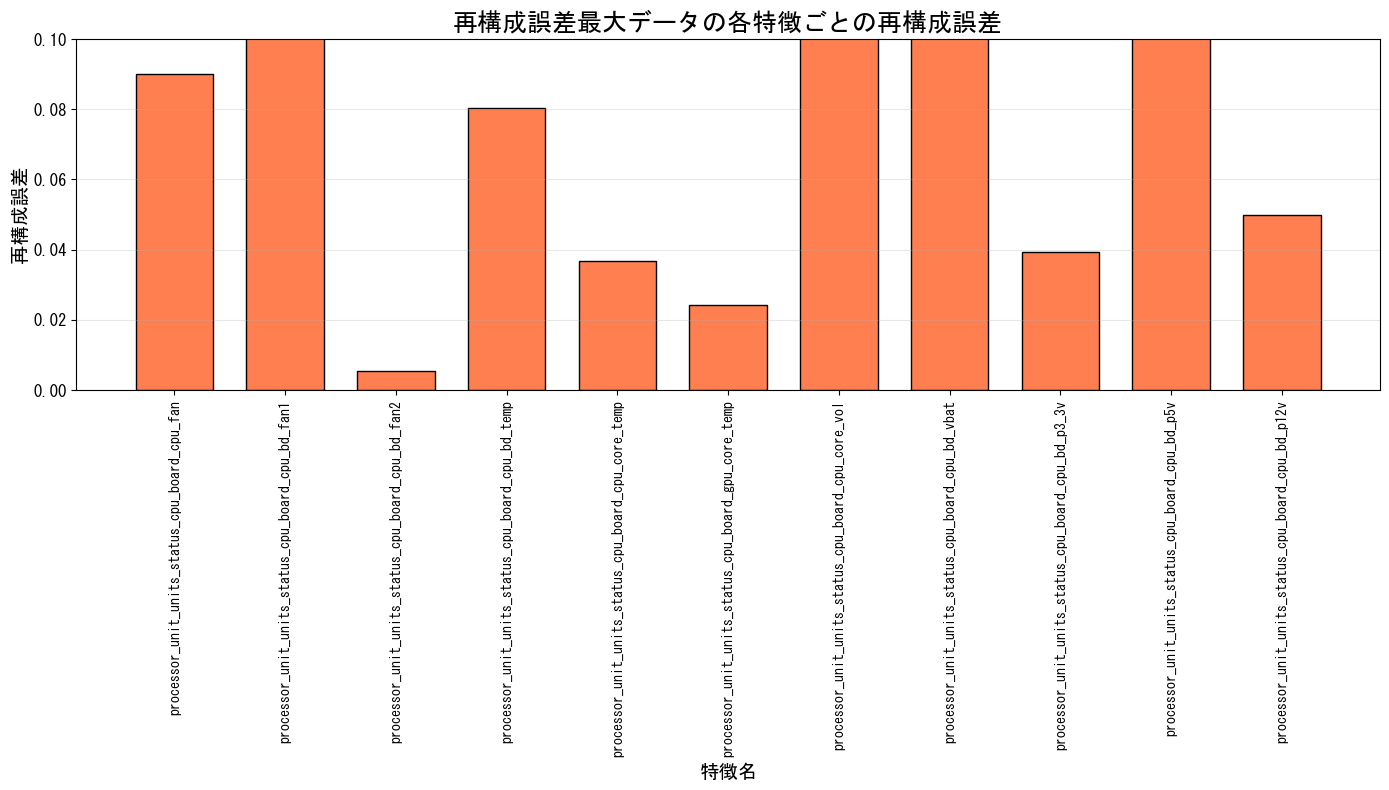

In [12]:
# 再構成誤差最大データの各特徴ごとの再構成誤差
# y_max: 縦軸の最大値
plot.plot_feature_max_errors(errors_max, y_max=0.1)

# 学習データの誤差可視化

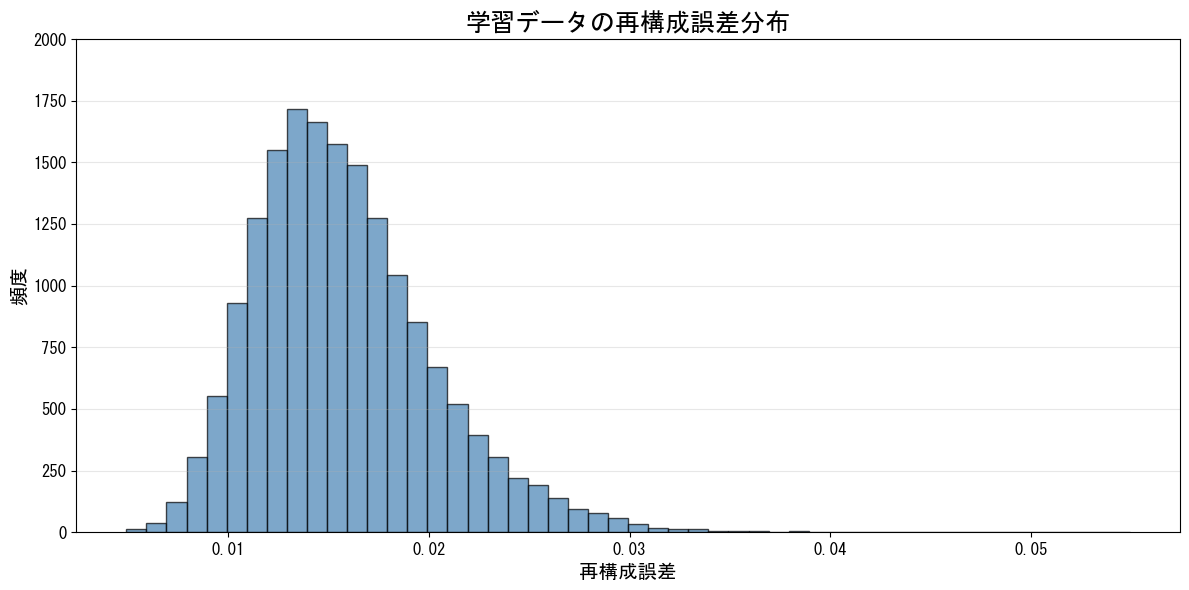

In [13]:
# 学習データの再構成誤差分布（ヒストグラム）
# bin_width: ビン幅
# y_max: 縦軸の最大値
plot.plot_error_histogram(errors_per_data, bin_width=0.001, y_max=2000)

# 学習推移の可視化

In [ ]:
# 各特徴ごとの各エポックごとの再構成誤差の推移
# feature_thresholds: 各特徴の基準値（辞書形式）
# y_max_avg: 平均誤差グラフの縦軸の最大値
# y_max_max: 最大誤差グラフの縦軸の最大値
plot.plot_learning_progress(learning_scores, config.columns_list, feature_thresholds, y_max_avg=0.02, y_max_max=0.06)

In [ ]:
# 特徴平均誤差・特徴最大誤差で使用する期間
feature_error_period = 1

# 学習ログで使用するパラメータ
learning_seed = 51
learning_period = 1
learning_unit13 = 22
learning_unit2 = 10

# 学習ログ
learning_scores_path = f"data/learning_scores/learning_scores_seed{learning_seed}/learning_scores_seed{learning_seed}_period{learning_period}/learning_scores_seed{learning_seed}_period{learning_period}_unit13_{learning_unit13}_unit2_{learning_unit2}.csv"

plot.plot_learning_progress(learning_scores, config.columns_list, feature_thresholds, y_max_avg=0.002, y_max_max=0.01)

In [ ]:
# 特徴平均誤差・特徴最大誤差で使用する期間
feature_error_period = 1

# 学習ログで使用するパラメータ
learning_seed = 51
learning_period = 1
learning_unit13 = 704
learning_unit2 = 10

# 学習ログ
learning_scores_path = f"data/learning_scores/learning_scores_seed{learning_seed}/learning_scores_seed{learning_seed}_period{learning_period}/learning_scores_seed{learning_seed}_period{learning_period}_unit13_{learning_unit13}_unit2_{learning_unit2}.csv"

plot.plot_learning_progress(learning_scores, config.columns_list, feature_thresholds, y_max_avg=0.002, y_max_max=0.01)

In [ ]:
# 特徴平均誤差・特徴最大誤差で使用する期間
feature_error_period = 1

# 学習ログで使用するパラメータ
learning_seed = [51,52]
learning_period = 1
learning_unit13 = [22,44,88,176,352,704]
learning_unit2 = 10

for i in range(len(learning_seed)):
    for j in range(len(learning_unit13)):
        # 学習ログ
        learning_scores_path = f"data/learning_scores/learning_scores_seed{learning_seed[i]}/learning_scores_seed{learning_seed[i]}_period{learning_period}/learning_scores_seed{learning_seed[i]}_period{learning_period}_unit13_{learning_unit13[j]}_unit2_{learning_unit2}.csv"
        print("シード値:", learning_seed[i], "ユニット数13:", learning_unit13[j])
        plot.plot_learning_progress(learning_scores, config.columns_list, feature_thresholds, y_max_avg=0.02, y_max_max=0.06)

In [9]:
# 重み可視化
plot.plot_network_weights(weight_path)

FileNotFoundError: [Errno 2] No such file or directory: 'data/weight/weight_seed{learning_seed}_period{learning_period}_unit13_{learning_unit13}_unit2_{learning_unit2}.csv'